In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from statsmodels.graphics.gofplots import qqplot

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/anujvyas/IPL-First-Innings-Score-Prediction-Deployment/master/ipl.csv')
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
data = data[((data['runs'] >= 20) & (data['runs'] <= 80)) & ((data['wickets'] >= 0) & (data['wickets'] <= 5))]

In [4]:
data.shape

(30775, 15)

In [5]:
data.shape

(30775, 15)

In [6]:
#considering only last 5 overs


In [7]:
len(data['mid'].unique())

617

In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data['date'] = data['date'].dt.date

In [10]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [11]:
print('the matches that where conducted are between',min(data['date']),'and',max(data['date']),'and are present in this dataframe')

the matches that where conducted are between 2008-04-18 and 2017-05-21 and are present in this dataframe


In [12]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

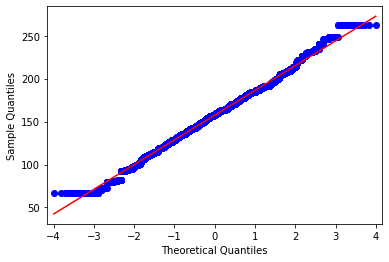

In [13]:
fig = qqplot(data['total'],line='s')
plt.show()

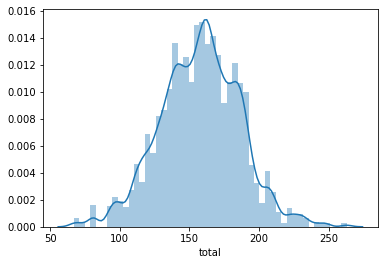

In [14]:
sns.distplot(data['total'])

In [15]:
#data['batsman'].unique()

In [16]:
#data['bowler'].unique()

In [17]:
data.reset_index(drop=True, inplace=True)

In [18]:
data['run_difference'] = 0

In [19]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_difference
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,21,0,1.5,21,0,18,0,222,0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,21,0,1.6,21,0,18,0,222,0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,21,0,2.1,21,0,18,0,222,0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,21,0,2.2,21,0,18,0,222,0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,22,0,2.3,22,0,18,0,222,0


In [20]:
data.loc[0,'run_difference'] = 1
for i in range(len(data['runs']) - 1):
    if data.loc[i,'bat_team'] == data.loc[i+1,'bat_team']:
        data.loc[i+1,'run_difference'] = data.loc[i+1,'runs'] - data.loc[i,'runs']
    else:
        i = i + 1

In [21]:
data.head(20)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_difference
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,21,0,1.5,21,0,18,0,222,1
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,21,0,1.6,21,0,18,0,222,0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,21,0,2.1,21,0,18,0,222,0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,21,0,2.2,21,0,18,0,222,0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,22,0,2.3,22,0,18,0,222,1
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,26,0,2.4,26,0,22,0,222,4
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,27,0,2.5,27,0,23,0,222,1
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,27,0,2.6,27,0,23,0,222,0
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,AA Noffke,32,0,3.0,32,0,23,0,222,5
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,AA Noffke,38,0,3.1,38,0,29,0,222,6


In [22]:
data_batsman = data.groupby('batsman')['run_difference'].sum().reset_index()
data_batsman = data_batsman.sort_values('run_difference',ascending=False)

In [23]:
data_batsman.shape

(239, 2)

### batsman who have scored most run in the ipl

In [24]:
data_batsman.head(50)

,batsman,run_difference
195,SK Raina,1134
183,S Dhawan,1007
53,DA Warner,870
223,V Kohli,853
73,G Gambhir,848
44,CH Gayle,792
173,RG Sharma,748
32,BB McCullum,728
180,RV Uthappa,724
194,SE Marsh,693


In [25]:
data['wicket_difference'] = 0
data.loc[0,'wicket_difference'] = 1
for i in range(len(data['wickets']) - 1):
    if data.loc[i,'bowl_team'] == data.loc[i+1,'bowl_team']:
        data.loc[i + 1,'wicket_difference'] = data.loc[i + 1,'wickets'] - data.loc[i,'wickets']
    else:
        i = i + 1

In [26]:
#data.head(200)

In [27]:
data_bowler = data.groupby('bowler')['wicket_difference'].sum().reset_index()
data_bowler = data_bowler.sort_values('wicket_difference',ascending=False)

### bowlers who have taken most number of wickets in the ipl

In [28]:
data_bowler.head(50)

,bowler,wicket_difference
5,A Mishra,34
201,PP Chawla,27
101,Harbhajan Singh,20
292,UT Yadav,19
120,JH Kallis,19
207,R Bhatia,18
264,SP Narine,18
311,YK Pathan,18
158,M Morkel,17
144,KV Sharma,17


In [29]:
data['run_difference'].shape

(30775,)

In [30]:
data.shape

(30775, 17)

In [31]:
data_batsman_team =  data.groupby(['bat_team','batsman'])['run_difference'].sum()
#data_batsman_team = data_batsman_team.sort_values('run_difference',ascending=False)

In [32]:
data_batsman_team

bat_team                     batsman             
Chennai Super Kings          BB McCullum             244
                             CK Kapugedera             0
                             DJ Bravo                 99
                             DJ Hussey                20
                             DR Smith                282
                             F du Plessis            269
                             GJ Bailey                31
                             JA Morkel                32
                             JDP Oram                  7
                             M Vijay                 456
                             MEK Hussey              362
                             ML Hayden               314
                             MS Dhoni                288
                             PA Patel                137
                             RA Jadeja                53
                             S Anirudha              -25
                             S Badrina

In [33]:
data_bowler_team =  data.groupby(['bowl_team','bowler'])['wicket_difference'].sum()

In [34]:
data_bowler_team

bowl_team                    bowler           
Chennai Super Kings          A Flintoff            0
                             A Nehra               0
                             AS Rajpoot            0
                             B Laughlin            1
                             BW Hilfenhaus         3
                             C Ganapathy           0
                             CH Morris             2
                             DE Bollinger          2
                             DJ Bravo              7
                             DP Nannes             1
                             DR Smith              1
                             IC Pandey             0
                             JA Morkel             7
                             JDP Oram              2
                             JM Kemp               0
                             JO Holder             0
                             Joginder Sharma       1
                             KMDN Kulasekara       1

In [35]:
data.shape

(30775, 17)

In [36]:
count_sixes = 0
for i in range(0,len(data['runs']) -1):
    if data.loc[i+1,'runs'] - data.loc[i,'runs'] == 6:
        count_sixes += 1
print('Number of sixes in last five overs in ipl is:',count_sixes)        

Number of sixes in last five overs in ipl is: 877


In [37]:
count_fours = 0
for i in range(0,len(data['runs']) -1):
    if data.loc[i+1,'runs'] - data.loc[i,'runs'] == 4:
        count_fours += 1
print('Number of fours last five overs in the ipl is:',count_fours)

Number of fours last five overs in the ipl is: 3221


In [38]:
count_dots = 0
for i in range(0,len(data['runs']) -1):
    if data.loc[i+1,'runs'] - data.loc[i,'runs'] == 0:
        count_dots += 1
print('Number of dots balls last five overs in the ipl is:',count_dots + 1)

Number of dots balls last five overs in the ipl is: 11351


### details of match in which total score went above 250 are........

In [39]:
#data[data['total'] > 250].sort_values(by='total')

### which venue has highest scores in them

In [40]:
avg_score_in_each_stadium = data.groupby('venue')['total'].mean().reset_index()
avg_score_in_each_stadium = avg_score_in_each_stadium.sort_values(by='total',ascending=False)

In [41]:
avg_score_in_each_stadium = pd.DataFrame(avg_score_in_each_stadium)
avg_score_in_each_stadium

,venue,total
1,Brabourne Stadium,178.552987
10,Himachal Pradesh Cricket Association Stadium,170.321267
16,Maharashtra Cricket Association Stadium,168.324523
0,Barabati Stadium,167.216438
25,Saurashtra Cricket Association Stadium,166.299335
21,"Punjab Cricket Association IS Bindra Stadium, ...",165.728778
14,M Chinnaswamy Stadium,164.801393
15,"MA Chidambaram Stadium, Chepauk",162.545844
34,Wankhede Stadium,162.335667
24,"Sardar Patel Stadium, Motera",161.106732


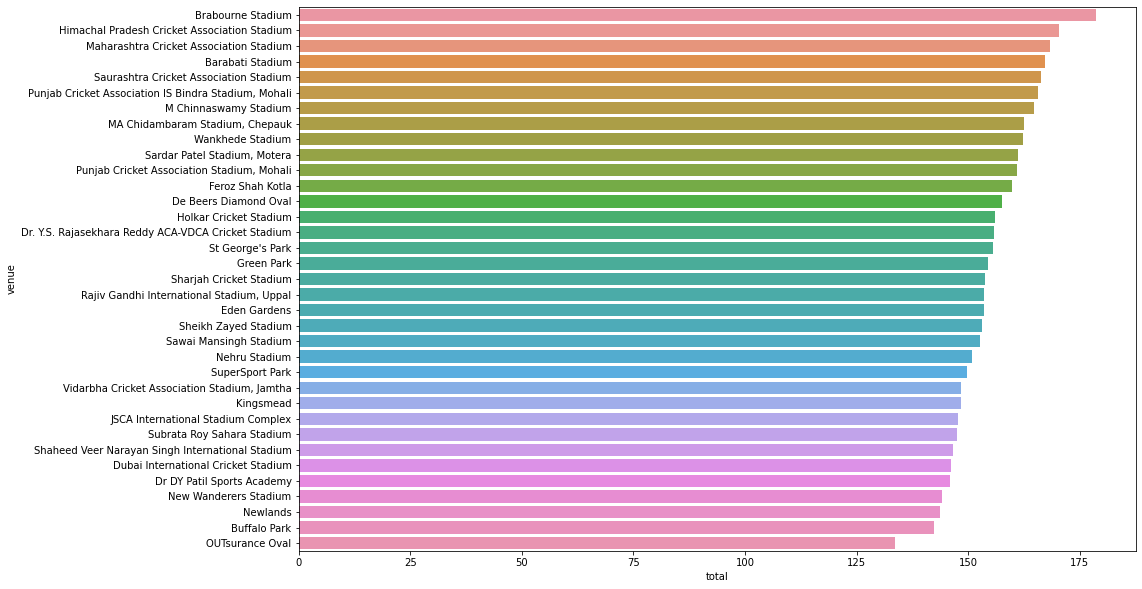

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(y='venue',x='total',data=avg_score_in_each_stadium)

### Average batting total for each team

In [43]:
avg_score_in_each_team = data.groupby('bat_team')['total'].mean().reset_index()
avg_score_in_each_team = avg_score_in_each_team.sort_values(by='total',ascending=False)
avg_score_in_each_team = pd.DataFrame(avg_score_in_each_team)
avg_score_in_each_team

,bat_team,total
11,Rising Pune Supergiants,169.830645
12,Royal Challengers Bangalore,163.581423
0,Chennai Super Kings,162.624443
10,Rising Pune Supergiant,162.436364
13,Sunrisers Hyderabad,160.256207
7,Mumbai Indians,160.241732
3,Gujarat Lions,158.192716
4,Kings XI Punjab,158.139561
6,Kolkata Knight Riders,155.643471
1,Deccan Chargers,155.056344


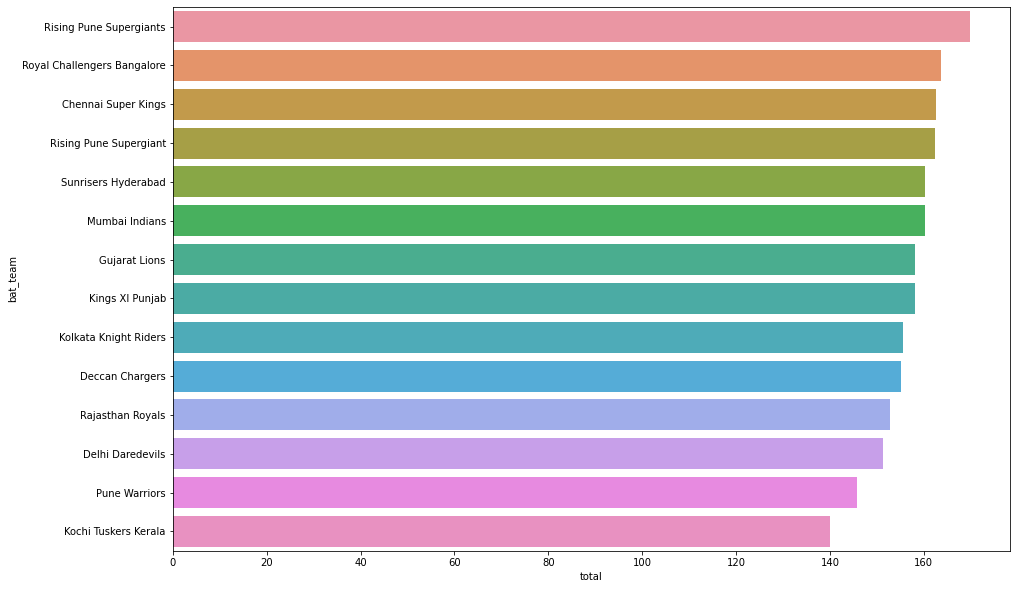

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(y='bat_team',x='total',data=avg_score_in_each_team)

In [45]:
avg_score_in_each_bowl_team = data.groupby('bowl_team')['total'].mean().reset_index()
avg_score_in_each_bowl_team = avg_score_in_each_bowl_team.sort_values(by='total',ascending=True)
avg_score_in_each_bowl_team = pd.DataFrame(avg_score_in_each_bowl_team)
avg_score_in_each_bowl_team

,bowl_team,total
5,Kochi Tuskers Kerala,143.567647
6,Kolkata Knight Riders,151.940464
13,Sunrisers Hyderabad,152.130181
11,Rising Pune Supergiants,154.011628
9,Rajasthan Royals,154.792435
8,Pune Warriors,156.209532
7,Mumbai Indians,156.493801
0,Chennai Super Kings,156.854704
10,Rising Pune Supergiant,158.424855
12,Royal Challengers Bangalore,158.522311


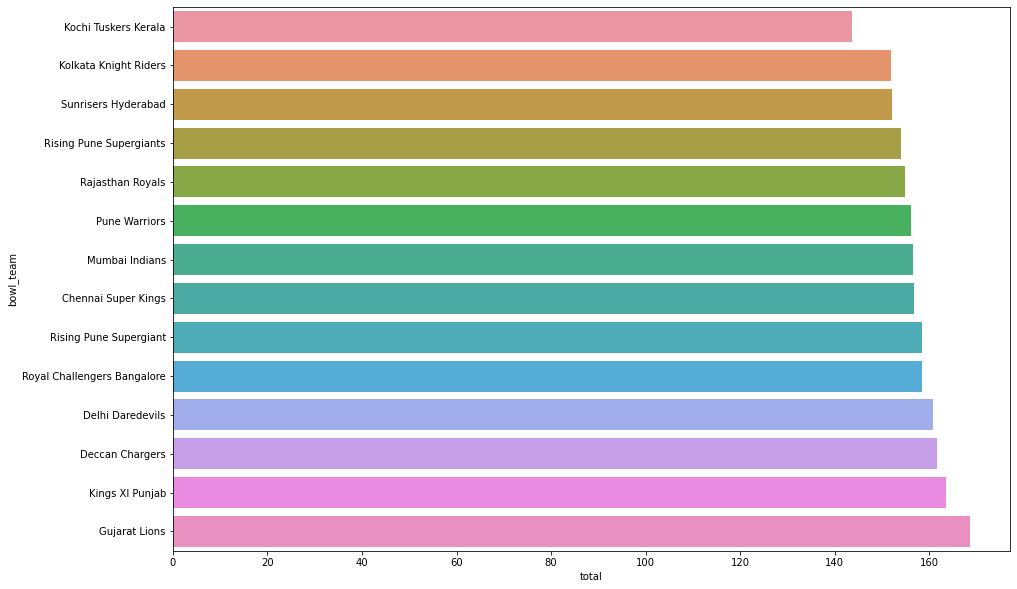

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(y='bowl_team',x='total',data=avg_score_in_each_bowl_team)

In [47]:
data_batsman.reset_index(drop=True, inplace=True)
data_bowler.reset_index(drop=True, inplace=True)

In [48]:
bat_map = {}
for i in range(0,data_batsman.shape[0]):
    bat_map[data_batsman.loc[i,'batsman']] = i + 1

In [49]:
bat_map

{'SK Raina': 1,
 'S Dhawan': 2,
 'DA Warner': 3,
 'V Kohli': 4,
 'G Gambhir': 5,
 'CH Gayle': 6,
 'RG Sharma': 7,
 'BB McCullum': 8,
 'RV Uthappa': 9,
 'SE Marsh': 10,
 'AM Rahane': 11,
 'SR Tendulkar': 12,
 'AB de Villiers': 13,
 'M Vijay': 14,
 'KC Sangakkara': 15,
 'R Dravid': 16,
 'PA Patel': 17,
 'KD Karthik': 18,
 'SR Watson': 19,
 'V Sehwag': 20,
 'DR Smith': 21,
 'AT Rayudu': 22,
 'AC Gilchrist': 23,
 'MEK Hussey': 24,
 'MK Pandey': 25,
 'JH Kallis': 26,
 'SC Ganguly': 27,
 'AJ Finch': 28,
 'F du Plessis': 29,
 'LMP Simmons': 30,
 'DJ Hussey': 31,
 'WP Saha': 32,
 'S Badrinath': 33,
 'Yuvraj Singh': 34,
 'YK Pathan': 35,
 'JP Duminy': 36,
 'DPMD Jayawardene': 37,
 'ML Hayden': 38,
 'MS Dhoni': 39,
 'SV Samson': 40,
 'NV Ojha': 41,
 'TM Dilshan': 42,
 'ST Jayasuriya': 43,
 'MK Tiwary': 44,
 'M Vohra': 45,
 'Mandeep Singh': 46,
 'SPD Smith': 47,
 'HH Gibbs': 48,
 'SS Tiwary': 49,
 'A Symonds': 50,
 'KL Rahul': 51,
 'KK Nair': 52,
 'GJ Maxwell': 53,
 'CL White': 54,
 'BJ Hodge': 5

In [50]:
bowl_map = {}
for i in range(0,data_bowler.shape[0]):
    bowl_map[data_bowler.loc[i,'bowler']] = i + 1

In [51]:
data['batsman'] = data['batsman'].map(bat_map)

In [52]:
data['bowler'] = data['bowler'].map(bowl_map)

In [53]:
avg_score_in_each_stadium['index'] = -1
i = 0
while(i < len(avg_score_in_each_stadium)):
    avg_score_in_each_stadium.loc[i,'index'] = i
    i = i + 1

In [54]:
avg_score_in_each_stadium

,venue,total,index
1,Brabourne Stadium,178.552987,1
10,Himachal Pradesh Cricket Association Stadium,170.321267,10
16,Maharashtra Cricket Association Stadium,168.324523,16
0,Barabati Stadium,167.216438,0
25,Saurashtra Cricket Association Stadium,166.299335,25
21,"Punjab Cricket Association IS Bindra Stadium, ...",165.728778,21
14,M Chinnaswamy Stadium,164.801393,14
15,"MA Chidambaram Stadium, Chepauk",162.545844,15
34,Wankhede Stadium,162.335667,34
24,"Sardar Patel Stadium, Motera",161.106732,24


In [55]:
avg_score_in_each_stadium.set_index('index',inplace=True)

In [56]:
avg_score_in_each_stadium

,venue,total
index,,
1,Brabourne Stadium,178.552987
10,Himachal Pradesh Cricket Association Stadium,170.321267
16,Maharashtra Cricket Association Stadium,168.324523
0,Barabati Stadium,167.216438
25,Saurashtra Cricket Association Stadium,166.299335
21,"Punjab Cricket Association IS Bindra Stadium, ...",165.728778
14,M Chinnaswamy Stadium,164.801393
15,"MA Chidambaram Stadium, Chepauk",162.545844
34,Wankhede Stadium,162.335667


In [57]:
stadium_map = {}
for i in range(0,avg_score_in_each_stadium.shape[0]):
    stadium_map[avg_score_in_each_stadium.loc[i,'venue']] = i + 1

In [58]:
data['venue'] = data['venue'].map(stadium_map)

In [59]:
stadium_map

{'Barabati Stadium': 1,
 'Brabourne Stadium': 2,
 'Buffalo Park': 3,
 'De Beers Diamond Oval': 4,
 'Dr DY Patil Sports Academy': 5,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 6,
 'Dubai International Cricket Stadium': 7,
 'Eden Gardens': 8,
 'Feroz Shah Kotla': 9,
 'Green Park': 10,
 'Himachal Pradesh Cricket Association Stadium': 11,
 'Holkar Cricket Stadium': 12,
 'JSCA International Stadium Complex': 13,
 'Kingsmead': 14,
 'M Chinnaswamy Stadium': 15,
 'MA Chidambaram Stadium, Chepauk': 16,
 'Maharashtra Cricket Association Stadium': 17,
 'Nehru Stadium': 18,
 'New Wanderers Stadium': 19,
 'Newlands': 20,
 'OUTsurance Oval': 21,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 22,
 'Punjab Cricket Association Stadium, Mohali': 23,
 'Rajiv Gandhi International Stadium, Uppal': 24,
 'Sardar Patel Stadium, Motera': 25,
 'Saurashtra Cricket Association Stadium': 26,
 'Sawai Mansingh Stadium': 27,
 'Shaheed Veer Narayan Singh International Stadium': 28,
 'Sharjah Cri

In [60]:
avg_score_in_each_team['index'] = -1
i = 0
while(i < len(avg_score_in_each_team)):
    avg_score_in_each_team.loc[i,'index'] = i
    i = i + 1

In [61]:
avg_score_in_each_team.set_index('index',inplace=True)

In [62]:
bat_team_map = {}
for i in range(0,avg_score_in_each_team.shape[0]):
    bat_team_map[avg_score_in_each_team.loc[i,'bat_team']] = i + 1

In [63]:
bat_team_map

{'Chennai Super Kings': 1,
 'Deccan Chargers': 2,
 'Delhi Daredevils': 3,
 'Gujarat Lions': 4,
 'Kings XI Punjab': 5,
 'Kochi Tuskers Kerala': 6,
 'Kolkata Knight Riders': 7,
 'Mumbai Indians': 8,
 'Pune Warriors': 9,
 'Rajasthan Royals': 10,
 'Rising Pune Supergiant': 11,
 'Rising Pune Supergiants': 12,
 'Royal Challengers Bangalore': 13,
 'Sunrisers Hyderabad': 14}

In [64]:
data['bat_team'] = data['bat_team'].map(bat_team_map)

In [65]:
data['bat_team'].unique()

array([ 7,  1, 10,  8,  2,  5, 13,  3,  6,  9, 14, 12,  4, 11],
      dtype=int64)

In [66]:
data['venue'].unique()

array([15, 23,  9, 35,  8, 27, 24, 16,  5, 20, 31, 14, 33,  3, 19,  4, 21,
        2, 25,  1, 34, 11, 18, 12,  6, 32, 28, 13, 30, 29,  7, 17, 22, 26,
       10], dtype=int64)

In [67]:
avg_score_in_each_bowl_team['index'] = -1
i = 0
while(i < len(avg_score_in_each_bowl_team)):
    avg_score_in_each_bowl_team.loc[i,'index'] = i
    i = i + 1

In [68]:
avg_score_in_each_bowl_team.set_index('index',inplace=True)

In [69]:
bowl_team_map = {}
for i in range(0,avg_score_in_each_bowl_team.shape[0]):
    bowl_team_map[avg_score_in_each_bowl_team.loc[i,'bowl_team']] = i + 1

In [70]:
bowl_team_map

{'Chennai Super Kings': 1,
 'Deccan Chargers': 2,
 'Delhi Daredevils': 3,
 'Gujarat Lions': 4,
 'Kings XI Punjab': 5,
 'Kochi Tuskers Kerala': 6,
 'Kolkata Knight Riders': 7,
 'Mumbai Indians': 8,
 'Pune Warriors': 9,
 'Rajasthan Royals': 10,
 'Rising Pune Supergiant': 11,
 'Rising Pune Supergiants': 12,
 'Royal Challengers Bangalore': 13,
 'Sunrisers Hyderabad': 14}

In [71]:
data['bowl_team'] = data['bowl_team'].map(bowl_team_map)

In [72]:
data['bowl_team'].unique()

array([13,  5,  3,  7, 10,  8,  1,  2,  9,  6, 14, 12,  4, 11],
      dtype=int64)

In [73]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,run_difference,wicket_difference
0,1,2008-04-18,15,7,13,8,19,21,0,1.5,21,0,18,0,222,1,1
1,1,2008-04-18,15,7,13,8,19,21,0,1.6,21,0,18,0,222,0,0
2,1,2008-04-18,15,7,13,27,48,21,0,2.1,21,0,18,0,222,0,0
3,1,2008-04-18,15,7,13,27,48,21,0,2.2,21,0,18,0,222,0,0
4,1,2008-04-18,15,7,13,27,48,22,0,2.3,22,0,18,0,222,1,0


In [74]:
#data[data['overs'] == 19.6].shape

In [75]:
data.isnull().sum()

mid                  0
date                 0
venue                0
bat_team             0
bowl_team            0
batsman              0
bowler               0
runs                 0
wickets              0
overs                0
runs_last_5          0
wickets_last_5       0
striker              0
non-striker          0
total                0
run_difference       0
wicket_difference    0
dtype: int64

In [76]:
data.dropna(inplace=True)

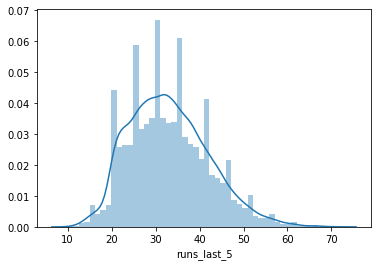

In [77]:
sns.distplot(data['runs_last_5'])

In [78]:
data.drop(['mid','date','striker','non-striker','run_difference','wicket_difference'],axis=1,inplace=True)

In [79]:
data.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,15,7,13,8,19,21,0,1.5,21,0,222
1,15,7,13,8,19,21,0,1.6,21,0,222
2,15,7,13,27,48,21,0,2.1,21,0,222
3,15,7,13,27,48,21,0,2.2,21,0,222
4,15,7,13,27,48,22,0,2.3,22,0,222


In [80]:
data.shape

(30775, 11)

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfr = RandomForestRegressor(n_jobs=-1)

In [83]:
features = data.drop(['total','batsman','bowler'],axis=1)
label = data['total']

In [84]:
import gc

#del data
gc.collect()

40

In [85]:
#from sklearn.linear_model import LinearRegression

#lr = LinearRegression()

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.15,random_state=0)

In [87]:
X_train.shape

(26158, 8)

In [88]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [89]:
X_test_scaled

array([[ 0.4769396 ,  0.27242832, -0.53045442, ..., -0.65321169,
         1.32950567, -0.05521665],
       [ 0.99842843, -0.94643051,  0.47664955, ...,  1.21117519,
        -0.1089179 ,  1.02185803],
       [-1.08752691,  0.02865656,  1.48375351, ..., -0.6173581 ,
         1.55080161, -0.05521665],
       ...,
       [ 1.4156195 ,  0.51620009, -0.53045442, ..., -0.50979731,
        -1.10474961, -0.05521665],
       [-1.08752691,  0.27242832, -0.02690244, ..., -0.94004044,
         0.44432193, -0.05521665],
       [ 0.89413067, -1.43397405,  0.72842554, ...,  0.38654253,
         0.223026  ,  1.02185803]])

In [90]:
#lr.fit(X_train_scaled,y_train)

In [91]:
#ypred_lr = lr.predict(X_test_scaled)

In [92]:
#ypred_lr

In [93]:
from sklearn import metrics

#metrics.r2_score(y_test,ypred_lr)

### testing our own predication

In [94]:
#from sklearn.model_selection import cross_val_score,cross_val_predict

In [95]:
#cvs = cross_val_score(rfr,X_train,y_train,scoring='r2',cv=7,n_jobs=1,verbose=10)

In [96]:
#metrics.SCORERS.keys()

In [97]:
#cvs

In [98]:
#cvs.mean()

In [99]:
#cvs_pred = cross_val_predict(cvs,X_test,y_test,n_jobs=-1,verbose=10,cv=2)

In [100]:
#cvs_pred.mean()

In [101]:
rfr_ = RandomForestRegressor()
rfr_.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
ypred_rfr = rfr_.predict(X_test)

In [103]:
print('for random forest')
print(metrics.r2_score(y_test,ypred_rfr))
print(metrics.mean_squared_error(y_test,ypred_rfr))
print(np.sqrt(metrics.mean_squared_error(y_test,ypred_rfr)))

for random forest
0.9142076523086279
71.63033262710297
8.463470483619764


In [104]:
test_data_rfr = [
    {
        'venue':15.0,
        'bat_team':7.0,
        'bowl_team':13.0,
        'runs':154.0,
        'wickets':2.0,
        'overs':15.1,
        'runs_last_5':62.0,
        'wickets_last_5':1.0
    }
]

test_df_rfr = pd.DataFrame(test_data_rfr)
print(test_df_rfr)

test_pred_rfr = rfr_.predict(test_df_rfr)

   venue  bat_team  bowl_team   runs  wickets  overs  runs_last_5  \
0   15.0       7.0       13.0  154.0      2.0   15.1         62.0   

   wickets_last_5  
0             1.0  


In [105]:
test_pred_rfr

array([137.7])

In [106]:
gc.collect()

46

In [107]:
import pickle
filename = 'first-innings-score-rfr-model.pkl'
pickle.dump(rfr_, open(filename, 'wb'))